# Telco Customer Churn

## Introduction

#### Churn Rate

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

## Context

"Predict behavior to retain customers. Our goal is to analyze all relevant customer data and develop focused customer retention programs."

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

Demographic info about customers – gender, age range, and if they have partners and dependents

## Data Description

customerID - Customer ID uniquly identifying record of a customer

gender - Customer gender (female, male)

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

Partner - Whether the customer has a partner or not (Yes, No)

Dependents - Whether the customer has dependents or not (Yes, No)

tenure - Number of months the customer has stayed with the company

PhoneService - Whether the customer has a phone service or not (Yes, No)

MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract -The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn -Whether the customer churned or not (Yes or No)

## Data Source

Telco Customer Churn - Focused customer retention programs

Data Source: Kaggle.com
https://www.kaggle.com/blastchar/telco-customer-churn

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Import Data

In [2]:
df = pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn-Dataset.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              5605 non-null object
SeniorCitizen       5630 non-null float64
Partner             5570 non-null object
Dependents          7043 non-null object
tenure              5740 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     5635 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       5592 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(3), object(18

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,0.0,NaN,No,NaN,No,No phone service,NaN,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,NaN,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5630.000000,5740.000000,7043.000000
mean,0.161456,32.487108,64.761692
std,0.367984,24.507180,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Imputing Null Values

In [7]:
df.isnull().sum()

customerID             0
gender              1438
SeniorCitizen       1413
Partner             1473
Dependents             0
tenure              1303
PhoneService           0
MultipleLines          0
InternetService     1408
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod       1451
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [8]:
#Finding the missing values and percentage
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(30)

,Total,Percent
Partner,1473,0.209144
PaymentMethod,1451,0.206020
gender,1438,0.204174
SeniorCitizen,1413,0.200625
InternetService,1408,0.199915
tenure,1303,0.185006
DeviceProtection,0,0.000000
MonthlyCharges,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000


In [9]:
#Using mean and mode to impute the missing values for the following columns

df['Partner'].fillna(df['Partner'].mode()[0], inplace=True)
df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)
df['tenure'].fillna(df['tenure'].mean(), inplace=True)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,No,No,1.000000,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.000000,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.000000,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,32.487108,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,32.487108,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(3), object(18

## Data Exploration

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Understand the Churn Colum

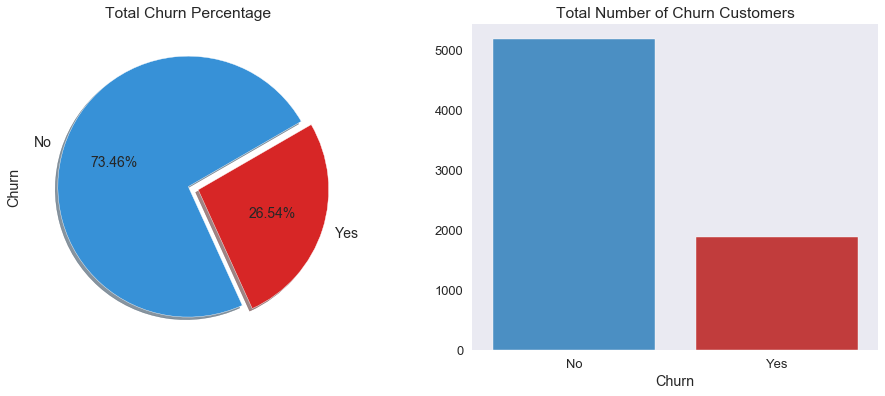

In [15]:
plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(16,6))

df['Churn'].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30, colors=["#3791D7", "#D72626"])
ax[0].set_title('Total Churn Percentage')

sns.countplot('Churn', data=df, ax=ax[1], palette=["#3791D7", "#D72626"])
ax[1].set_title('Total Number of Churn Customers')
ax[1].set_ylabel(' ')

plt.show()

The data shows that 26.54% of the company's customers have decided to cut ties. 

### Churn VS Other Columns

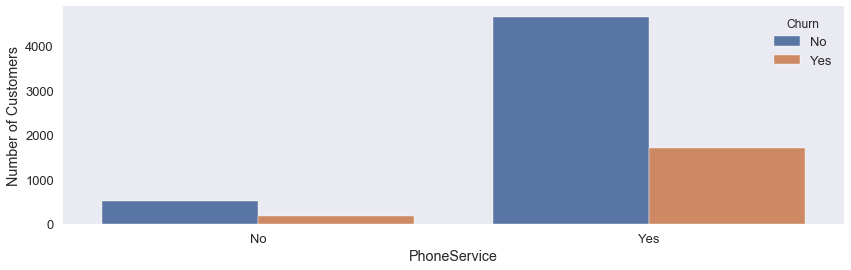

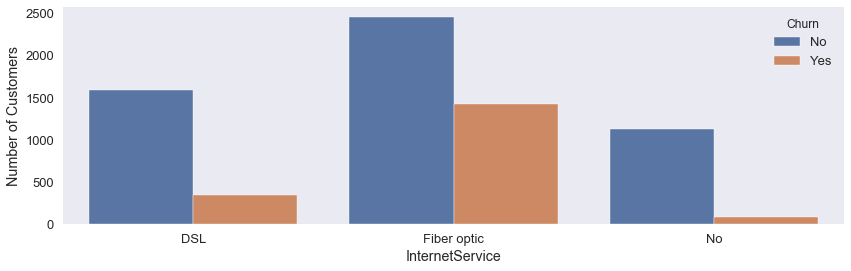

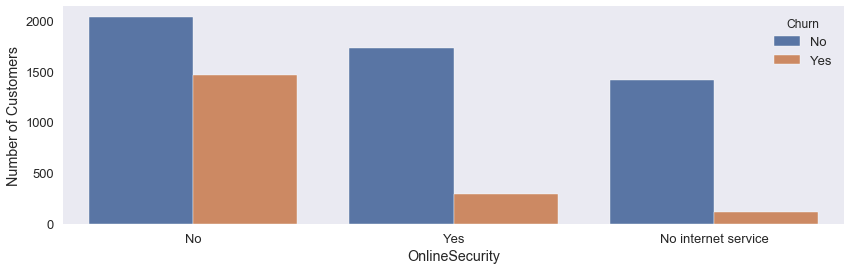

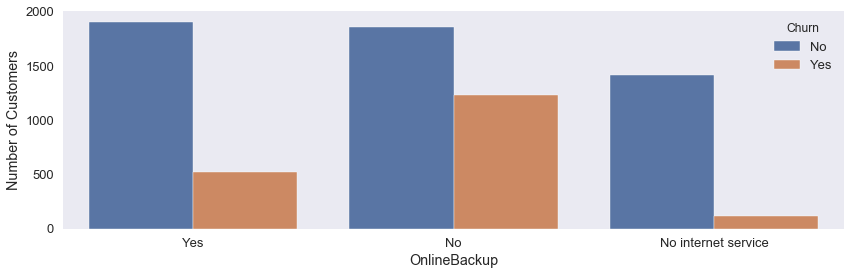

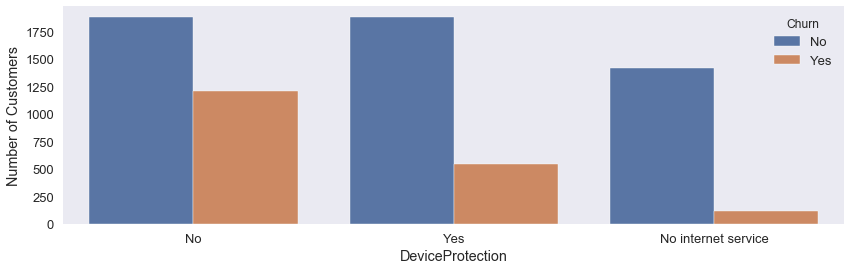

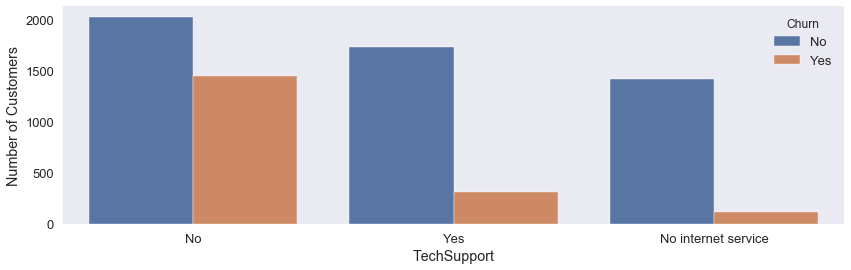

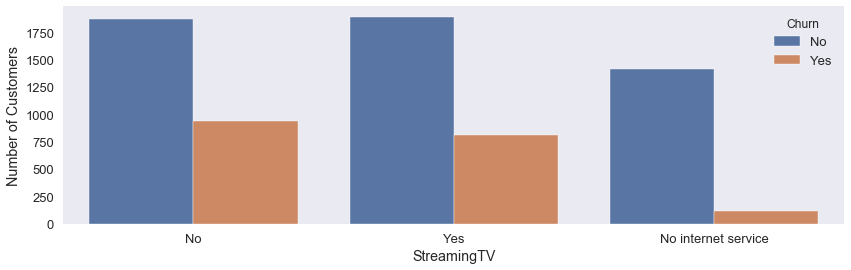

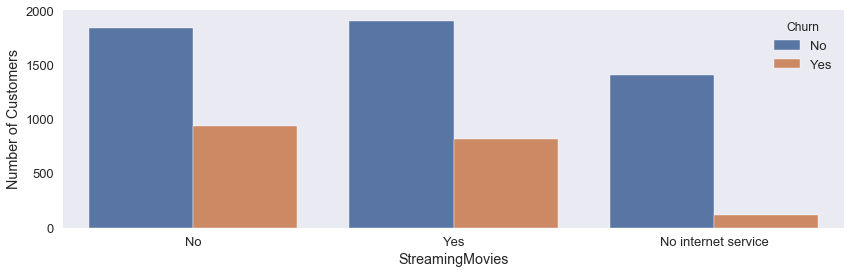

In [16]:
cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in cols:
    plt.figure(figsize=(14,4))
    sns.countplot(x=i, hue='Churn', data=df)
    plt.ylabel('Number of Customers')
    plt.show()

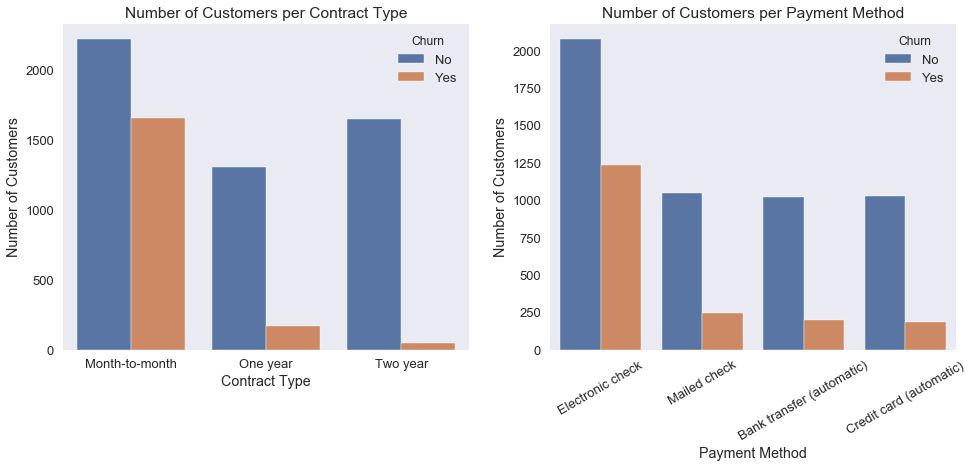

In [17]:
plt.style.use(['seaborn-dark','seaborn-talk'])
fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.countplot(x='Contract', data=df, hue='Churn', ax=ax[0])
ax[0].set_title('Number of Customers per Contract Type')
ax[0].set_xlabel('Contract Type')
ax[0].set_ylabel('Number of Customers')

sns.countplot(x='PaymentMethod', data=df, hue='Churn', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 30)
ax[1].set_title('Number of Customers per Payment Method')
ax[1].set_xlabel('Payment Method')
ax[1].set_ylabel('Number of Customers')

plt.show()

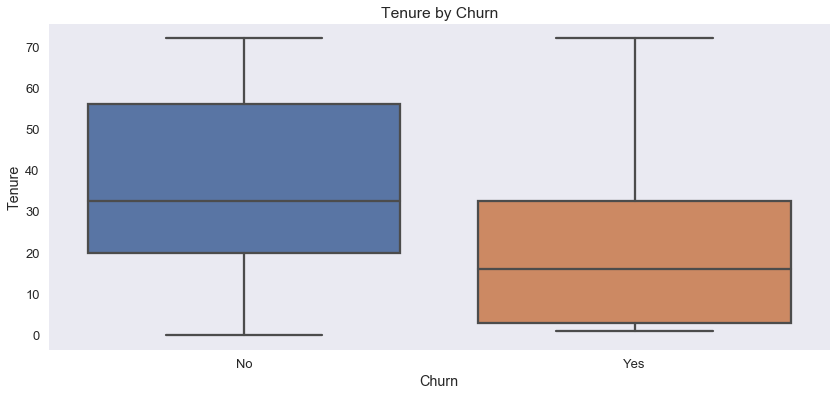

In [18]:
plt.figure(figsize=(14,6))

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.show()

In [19]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

### Tenure Column

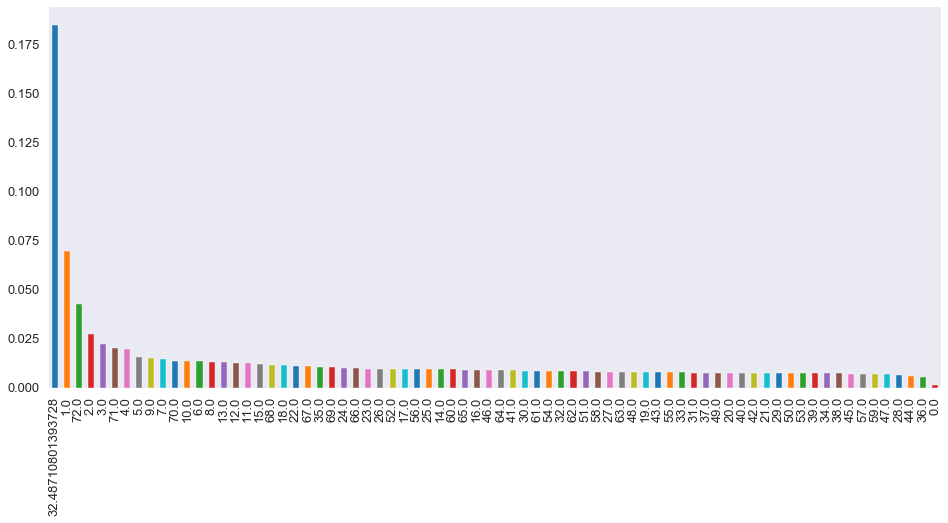

In [20]:
df.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(16,7),color=colors);

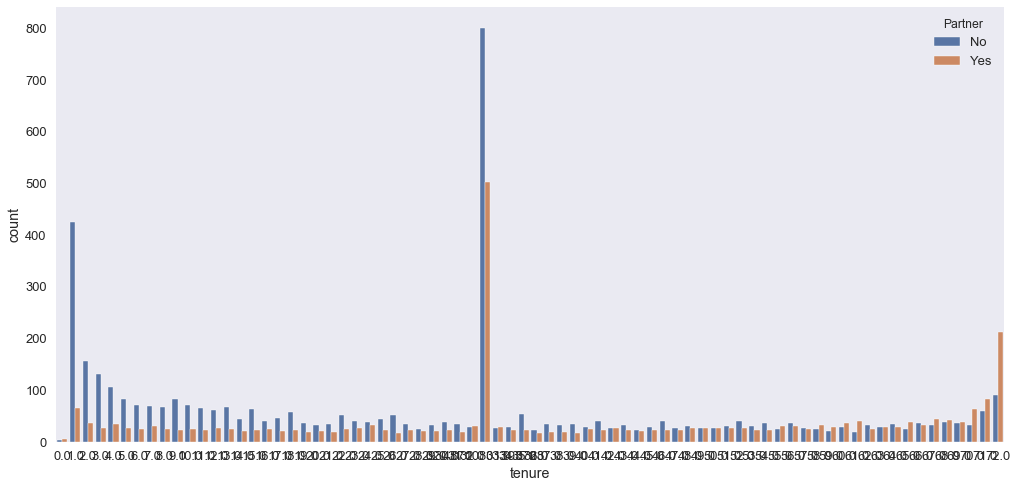

In [21]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

### Online Security

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

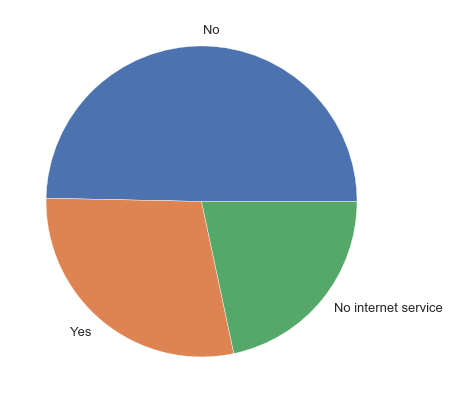

In [22]:
plt.pie(df['OnlineSecurity'].value_counts(),labels=df['OnlineSecurity'].unique())
df['OnlineSecurity'].value_counts()

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160DEA0E888>,
      dtype=object)

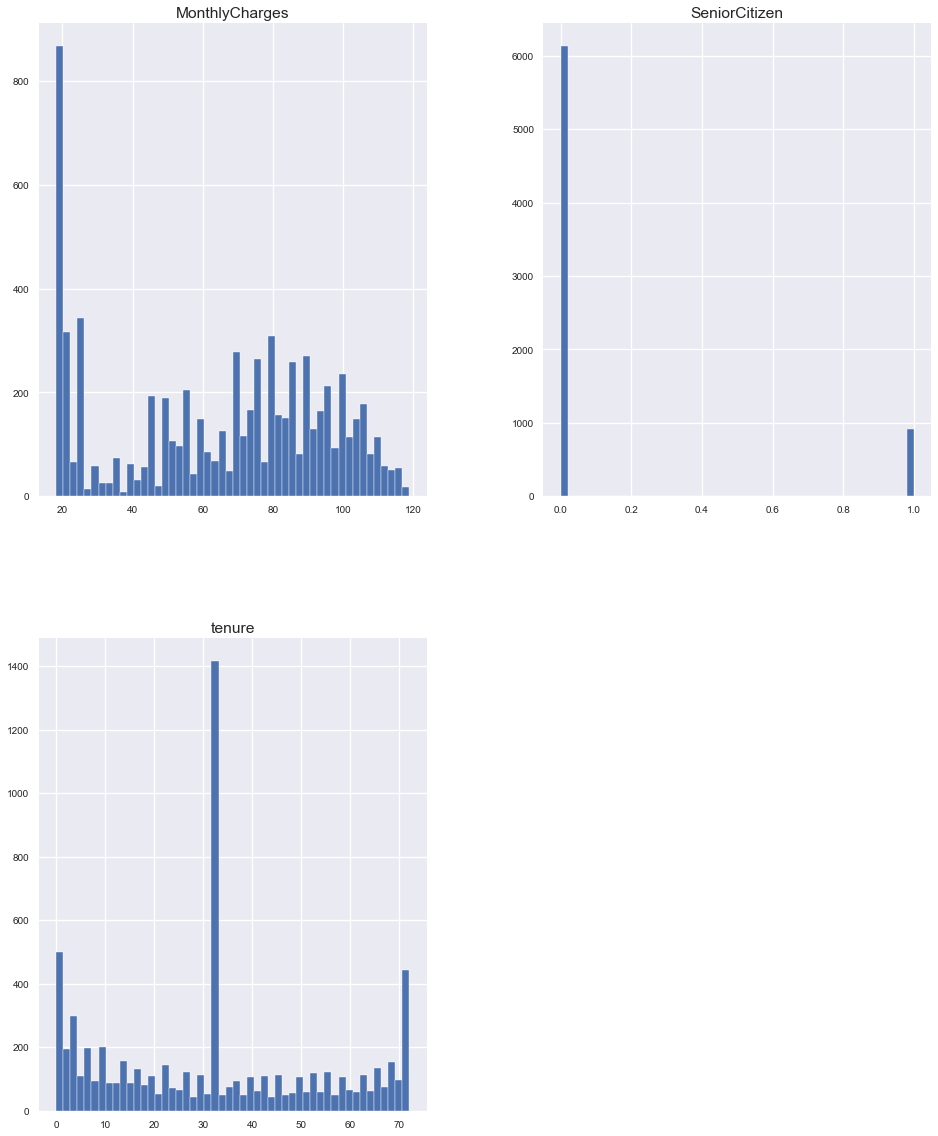

In [23]:
df.hist(figsize=(16,20),bins=50,xlabelsize=10,ylabelsize=10)

### Correlation Matrix

In [24]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
for i in df.columns:
    df[i] = number.fit_transform(df[i].astype('str'))

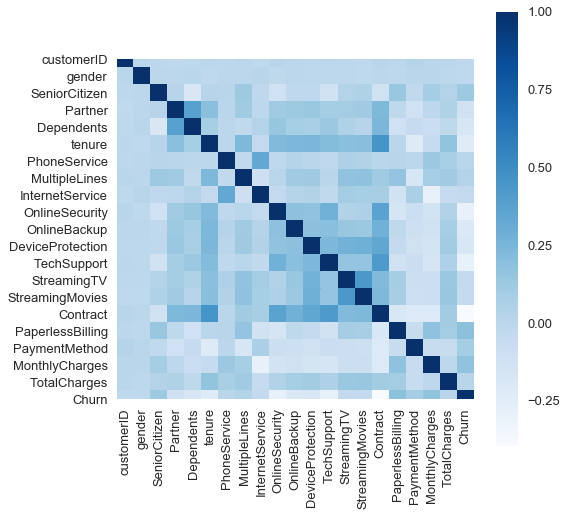

In [25]:
features_correlation = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

## Data Analysis

### Pre-Processing

In [26]:
#Dropping Customer ID Column
df.drop(['customerID'],axis=1,inplace= True)

In [27]:
# Converting string to float for Total Charges Column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [28]:
#Getting dummies for Categorical columns
df = pd.get_dummies(df,columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [29]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_0',
       'gender_1', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_0',
       'Partner_1', 'Dependents_0', 'Dependents_1', 'PhoneService_0',
       'PhoneService_1', 'MultipleLines_0', 'MultipleLines_1',
       'MultipleLines_2', 'InternetService_0', 'InternetService_1',
       'InternetService_2', 'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_0', 'OnlineBackup_1',
       'OnlineBackup_2', 'DeviceProtection_0', 'DeviceProtection_1',
       'DeviceProtection_2', 'TechSupport_0', 'TechSupport_1', 'TechSupport_2',
       'StreamingTV_0', 'StreamingTV_1', 'StreamingTV_2', 'StreamingMovies_0',
       'StreamingMovies_1', 'StreamingMovies_2', 'Contract_0', 'Contract_1',
       'Contract_2', 'PaperlessBilling_0', 'PaperlessBilling_1',
       'PaymentMethod_0', 'PaymentMethod_1', 'PaymentMethod_2',
       'PaymentMethod_3'],
      dtype='object')

In [30]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,446,2505,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,29,802,1466,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,12,740,157,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,27,570,1400,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,27,1033,925,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## Data Processing

In [31]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [32]:
X.describe()

,tenure,MonthlyCharges,TotalCharges,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,34.082067,783.182877,3257.794122,0.397558,0.602442,0.870936,0.129064,0.618770,0.381230,0.700412,...,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.173080,0.172370,0.470254,0.184296
std,22.210684,466.006171,1888.693496,0.489428,0.489428,0.335295,0.335295,0.485723,0.485723,0.458110,...,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.378343,0.377728,0.499150,0.387753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,338.000000,1609.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,761.000000,3249.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1204.000000,4901.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,73.000000,1584.000000,6530.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#Split the data to train and test sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [34]:
#Standardize the training and test sets
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

#Check the number of records in training and test partitions
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (5282, 46)
X_test : (1761, 46)
y_train : (5282,)
y_test : (1761,)


In [35]:
X_train_df = pd.DataFrame(X_train, columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)
X_test_df.head()

,tenure,MonthlyCharges,TotalCharges,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0.369863,0.513889,0.013323,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.794521,0.181187,0.848851,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.068493,0.667298,0.976723,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.013699,0.215909,0.247320,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.712329,0.731692,0.556968,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [36]:
X_test_df.describe()

,tenure,MonthlyCharges,TotalCharges,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,...,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.455073,0.489303,0.492071,0.377626,0.622374,0.873367,0.126633,0.624645,0.375355,0.705281,...,0.392391,0.541170,0.203294,0.255537,0.423623,0.576377,0.172629,0.178308,0.471323,0.177740
std,0.301435,0.297390,0.290455,0.484931,0.484931,0.332655,0.332655,0.484352,0.484352,0.456046,...,0.488422,0.498444,0.402563,0.436286,0.494272,0.494272,0.378034,0.382880,0.499319,0.382402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.219178,0.212121,0.245023,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.369863,0.472222,0.483920,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.712329,0.759470,0.741348,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.999847,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# KNN Classifier

In [37]:
# imports 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

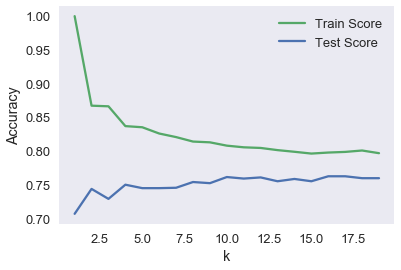

In [39]:
# plot the value of K and accuracy
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [40]:
#Based on above graph we selected 16 as the best number of neighbours
knn = KNeighborsClassifier(16)
knn.fit(X_train, y_train)
print('Train score: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(knn.score(X_test, y_test)))

Train score: 0.80
Test score: 0.76


### Cross Validation

In [41]:
# search for an optimal value of K for KNN

k_range = range(1, 20)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6979896782853809, 0.7415867745354027, 0.725823346601972, 0.7496801434374922, 0.7400230621986641, 0.7533717145387777, 0.7525150051749295, 0.7556404121532202, 0.7516643460305974, 0.7563554813211868, 0.7539396994597162, 0.7562124261592348, 0.7562142412250896, 0.7596207128562951, 0.7560699783120695, 0.7621781389261093, 0.7606138238602543, 0.7640227144328489, 0.7610407655823389]


Text(0, 0.5, 'Cross-Validated Accuracy')

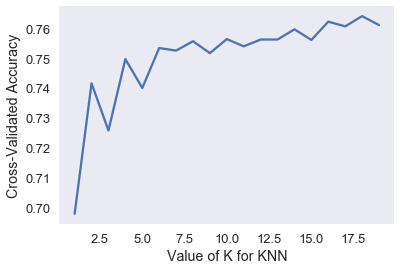

In [42]:
# plot the value of K and the cross-validated accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Gridsearch with Cross Validation

In [43]:
from sklearn.model_selection import GridSearchCV

k_range = range(1, 20)
param_grid= {'n_neighbors':k_range}
knn_clf = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score=True)
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=19, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [44]:
print("Best parameters: {}",knn_clf.best_params_)
print("Best cross-validation score: {:.2f}".format(knn_clf.best_score_))

Best parameters: {} {'n_neighbors': 16}
Best cross-validation score: 0.77


In [45]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(knn_clf.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.031024,0.005680,0.262477,0.015503,1,{'n_neighbors': 1},0.731569,0.722117,0.697543,0.714556,...,0.999369,0.999369,0.999369,0.999579,0.999579,0.999790,0.999369,0.999579,0.999474,0.000141
1,0.033011,0.005316,0.302709,0.009875,2,{'n_neighbors': 2},0.752363,0.771267,0.741021,0.748582,...,0.865769,0.868504,0.865348,0.865979,0.868770,0.866456,0.865405,0.867718,0.867201,0.001480
2,0.034074,0.009496,0.326437,0.017411,3,{'n_neighbors': 3},0.750473,0.758034,0.737240,0.737240,...,0.863665,0.866821,0.862192,0.867242,0.864564,0.866877,0.863302,0.868980,0.865644,0.002014
3,0.036043,0.003738,0.352932,0.009525,4,{'n_neighbors': 4},0.775047,0.771267,0.758034,0.750473,...,0.837155,0.837576,0.837576,0.838628,0.838486,0.839958,0.835542,0.834069,0.836888,0.001897
4,0.030006,0.005891,0.376174,0.015734,5,{'n_neighbors': 5},0.765595,0.754253,0.763705,0.771267,...,0.838628,0.834000,0.837997,0.836524,0.836593,0.836383,0.833859,0.827971,0.834848,0.002943


In [46]:
knn_clf_best = KNeighborsClassifier(n_neighbors=16).fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn_clf_best.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn_clf_best.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.80
Accuracy of KNN classifier on test set: 0.76


### F1 Score for KNN

Since the customer churn rate which is the positive class in this dataset is in minority, we decided to use F1 Score as our evaluation strategy to get the best test scores.  

In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("F1 Score for KNN classifier on training set {:.4f}".format(f1_score(y_train,knn_clf_best.predict(X_train) , average='micro')))
print("F1 Score for KNN classifier on test set {:.4f}".format(f1_score(y_test,knn_clf_best.predict(X_test) , average='micro')))

F1 Score for KNN classifier on training set 0.7972
F1 Score for KNN classifier on test set 0.7621


# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

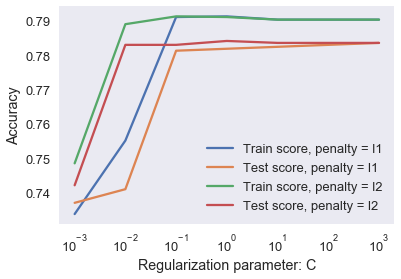

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [50]:
#From the above graph, we can see that C=0.01 and penalty='l2' is the best choice
lreg = LogisticRegression(C = 0.01, penalty='l2', solver = 'liblinear')
lreg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(lreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(lreg.score(X_test, y_test)))

Train score: 0.79
Test score: 0.78


### Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross-validation scores: [0.77730496 0.79148936 0.77304965 0.8        0.78551136 0.77556818
 0.78977273 0.77840909 0.78835227 0.79374111]


C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.79


### Gridsearch with Cross-Validation

In [53]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'] }

In [54]:
from sklearn.model_selection import GridSearchCV

log_clf = GridSearchCV(LogisticRegression(), param_grid,cv=10,return_train_score=True)
log_clf.fit(X_train,y_train)

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [55]:
print("Best cross-validation score: {:.2f}".format(log_clf.best_score_))
print("Best parameter: {}".format(log_clf.best_params_))

Best cross-validation score: 0.79
Best parameter: {'C': 0.01, 'penalty': 'l2'}


In [56]:
# convert to DataFrame
results = pd.DataFrame(log_clf.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.016876,0.005161,0.001443,0.002558,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.733459,0.733459,0.733459,...,0.733852,0.733852,0.733852,0.733852,0.733754,0.733754,0.733754,0.733754,0.733813,0.000048
1,0.018076,0.002869,0.000664,0.000574,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.748582,0.748582,0.748582,...,0.744793,0.744793,0.745634,0.746897,0.746583,0.746583,0.745110,0.741325,0.744899,0.001620
2,0.022097,0.006330,0.001281,0.003002,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.761815,0.756144,0.756144,...,0.753419,0.753419,0.752998,0.755944,0.753943,0.752471,0.754154,0.751209,0.753397,0.001184
3,0.025356,0.005387,0.002797,0.005033,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.803403,0.795841,0.799622,...,0.788344,0.791500,0.788555,0.792342,0.791377,0.793481,0.788854,0.788013,0.789957,0.001900
4,0.040543,0.010836,0.000875,0.000771,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.805293,0.792060,0.792060,...,0.791500,0.794866,0.791079,0.792762,0.791798,0.796425,0.789485,0.790116,0.792061,0.002044


In [57]:
log_clf_best = LogisticRegression(C=0.01, penalty = 'l2',solver = 'liblinear')
log_clf_best.fit(X_train,y_train)

print('Accuracy of Logistic Regression on training set: {:.2f}'.format(log_clf_best.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(log_clf_best.score(X_test, y_test)))

Accuracy of Logistic Regression on training set: 0.79
Accuracy of Logistic Regression on test set: 0.78


In [58]:
from sklearn.metrics import confusion_matrix

log_train = log_clf_best.predict(X_train)
confusion_train = confusion_matrix(y_train, log_train)
log_test = log_clf_best.predict(X_test)
confusion_test = confusion_matrix(y_test, log_test)

print('Logistic Regression for train \n', confusion_train)
print('Logistic Regression for test \n', confusion_test)

Logistic Regression for train 
 [[3517  359]
 [ 755  651]]
Logistic Regression for test 
 [[1186  112]
 [ 270  193]]


### F1 Score

In [59]:
print("F1 Score for Logistic Regression on training set {:.4f}".format(f1_score(y_train,log_clf_best.predict(X_train) , average='micro')))
print("F1 Score for Logistic Regression on test set {:.4f}".format(f1_score(y_test,log_clf_best.predict(X_test) , average='micro')))

F1 Score for Logistic Regression on training set 0.7891
F1 Score for Logistic Regression on test set 0.7831


# Linear SVC

In [61]:
from sklearn.svm import LinearSVC

lin = LinearSVC()
lin.fit(X_train,y_train)
print('Train score: {:.2f}'.format(lin.score(X_train, y_train)))
print('Test score: {:.2f}'.format(lin.score(X_test, y_test)))

Train score: 0.79
Test score: 0.79


## Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score

LinSVC = LinearSVC()

scores = cross_val_score(LinSVC, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Cross-validation scores: [0.37304965 0.74326241 0.73617021 0.73049645 0.64488636 0.74005682
 0.65340909 0.36363636 0.734375   0.69843528]


C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [63]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.64


### Gridsearch with Cross Validation

In [64]:
from sklearn.svm import LinearSVC

In [65]:
LinSVC = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [66]:
LinSVC_clf = GridSearchCV(LinSVC, param_grid, cv=10)
LinSVC_clf.fit(X_train,y_train)

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
print("Best cross-validation score: {:.2f}".format(LinSVC_clf.best_score_))
print("Best parameter: {}".format(LinSVC_clf.best_params_))

Best cross-validation score: 0.79
Best parameter: {'C': 0.01}


In [68]:
LinSVC_clf_best = LinearSVC(C=0.01)
LinSVC_clf_best.fit(X_train,y_train)
print('Accuracy of Linear Regression on training set: {:.2f}'.format(LinSVC_clf_best.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'.format(LinSVC_clf_best.score(X_test, y_test)))

Accuracy of Linear Regression on training set: 0.79
Accuracy of Linear Regression on test set: 0.78


### Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix
LinSVC_predicted = LinSVC_clf_best.predict(X_test)
confusion = confusion_matrix(y_test, LinSVC_predicted)

print('Linear SVM \n', confusion)

Linear SVM 
 [[1162  136]
 [ 249  214]]


### F1 Score

In [70]:
print("F1 Score for Linear SVM on training set {:.4f}".format(f1_score(y_train,LinSVC_clf_best.predict(X_train) , average='micro')))
print("F1 Score for Linear SVM on test set {:.4f}".format(f1_score(y_test,LinSVC_clf_best.predict(X_test) , average='micro')))

F1 Score for Linear SVM on training set 0.7933
F1 Score for Linear SVM on test set 0.7814


# SVM with Linear Kernel

In [71]:
from sklearn.svm import SVC

linsvc = SVC(kernel='linear')
linsvc.fit(X_train, y_train)
print('Train score: {:.2f}'.format(linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(linsvc.score(X_test, y_test)))

Train score: 0.79
Test score: 0.78


### Gridsearch with Cross-Validation

In [72]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_linear = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10, return_train_score=True)

In [74]:
svc_linear.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [75]:
print("Best parameters: {}".format(svc_linear.best_params_))
print("Best cross-validation score: {:.2f}".format(svc_linear.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.79


In [76]:
svc_linear_best = SVC(kernel ='linear', C=1)
svc_linear_best.fit(X_train,y_train)
print('Accuracy of SVM_Linear Kernel on training set: {:.2f}'.format(svc_linear_best.score(X_train, y_train)))
print('Accuracy of SVM_Linear Kernel on test set: {:.2f}'.format(svc_linear_best.score(X_test, y_test)))

Accuracy of SVM_Linear Kernel on training set: 0.79
Accuracy of SVM_Linear Kernel on test set: 0.78


### F1 Score

In [77]:
print("F1 Score for SVM_Linear Kernel on training set {:.4f}".format(f1_score(y_train,svc_linear_best.predict(X_train) , average='micro')))
print("F1 Score for SVM_Linear Kernel on test set {:.4f}".format(f1_score(y_test,svc_linear_best.predict(X_test) , average='micro')))

F1 Score for SVM_Linear Kernel on training set 0.7910
F1 Score for SVM_Linear Kernel on test set 0.7819


# SVM with RBF Kernel

In [78]:
from sklearn.svm import SVC

rbfsvc = SVC(kernel='rbf')
rbfsvc.fit(X_train, y_train)
print('Train score: {:.2f}'.format(rbfsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(rbfsvc.score(X_test, y_test)))

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score: 0.79
Test score: 0.78


### Gridsearch with Cross-Validation


In [79]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_rbf = GridSearchCV(SVC(), param_grid, cv=10, return_train_score=True)
svc_rbf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [81]:
print("Best parameters: {}".format(svc_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(svc_rbf.best_score_))

Best parameters: {'C': 10, 'gamma': 0.001}
Best cross-validation score: 0.79


In [80]:
svc_rbf_best = SVC(kernel ='rbf', C=10,gamma=0.001)
svc_rbf_best.fit(X_train,y_train)
print('Accuracy of SVM_rbf on training set: {:.2f}'.format(svc_rbf_best.score(X_train, y_train)))
print('Accuracy of SVM_rbf on test set: {:.2f}'.format(svc_rbf_best.score(X_test, y_test)))

Accuracy of SVM_rbf on training set: 0.80
Accuracy of SVM_rbf on test set: 0.79


### F1 Score

In [83]:
print("F1 Score for SVM with RBF Kernel on training set {:.4f}".format(f1_score(y_train,svc_rbf_best.predict(X_train) , average='micro')))
print("F1 Score for SVM with RBF Kernel on test set {:.4f}".format(f1_score(y_test,svc_rbf_best.predict(X_test) , average='micro')))

F1 Score for SVM with RBF Kernel on training set 0.7908
F1 Score for SVM with RBF Kernel on test set 0.7780


# SVM with Poly Kernel

In [84]:
polysvc = SVC(kernel='poly')
polysvc.fit(X_train, y_train)
print('Train score: {:.2f}'.format(polysvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(polysvc.score(X_test, y_test)))

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score: 0.78
Test score: 0.78


### Gridsearch with Cross-Validation

In [85]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'degree': [1,3]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 3]}


In [86]:
svc_poly = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, return_train_score=True)
svc_poly.fit(X_train, y_train)

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [87]:
print("Best parameters: {}".format(svc_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(svc_poly.best_score_))

Best parameters: {'C': 1, 'degree': 1}
Best cross-validation score: 0.79


In [88]:
svc_poly_best = SVC(kernel ='poly', C=1, degree=1)
svc_poly_best.fit(X_train,y_train)
print('Accuracy on training set: {:.2f}'.format(svc_poly_best.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(svc_poly_best.score(X_test, y_test)))

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.79
Accuracy on test set: 0.78


### F1 Score for KNN

In [89]:
print("F1 Score for SVM with Poly Kernel on training set {:.4f}".format(f1_score(y_train,svc_poly_best.predict(X_train) , average='micro')))
print("F1 Score for SVM with Poly Kernel on test set {:.4f}".format(f1_score(y_test,svc_poly_best.predict(X_test) , average='micro')))

F1 Score for SVM with Poly Kernel on training set 0.7899
F1 Score for SVM with Poly Kernel on test set 0.7780


### Comparing all SVM Models

In [90]:
print('Train score on best parameters for LinearSVC - {:.4f}'.format(LinSVC_clf_best.score(X_train, y_train)))
print('Test score on best parameters for LinearSVC - {:.4f}'.format(LinSVC_clf_best.score(X_test,y_test)))
print('Train score on best parameters for SVC kernel - Linear {:.4f}'.format(svc_linear_best.score(X_train,y_train)))
print('Test score on best parameters for SVC kernel - Linear {:.4f}'.format(svc_linear_best.score(X_test,y_test)))
print('Train score on best parameters for SVC kernel - rbf {:.4f}'.format(svc_rbf_best.score(X_train,y_train)))
print('Test score on best parameters for SVC kernel - rbf {:.4f}'.format(svc_rbf_best.score(X_test,y_test)))
print('Train score on best parameters for SVC kernel - poly {:.4f}'.format(svc_poly_best.score(X_train,y_train)))
print('Test score on best parameters for SVC kernel - poly {:.4f}'.format(svc_poly_best.score(X_test,y_test)))

Train score on best parameters for LinearSVC - 0.7933
Test score on best parameters for LinearSVC - 0.7814
Train score on best parameters for SVC kernel - Linear 0.7910
Test score on best parameters for SVC kernel - Linear 0.7819
Train score on best parameters for SVC kernel - rbf 0.7908
Test score on best parameters for SVC kernel - rbf 0.7780
Train score on best parameters for SVC kernel - poly 0.7899
Test score on best parameters for SVC kernel - poly 0.7780


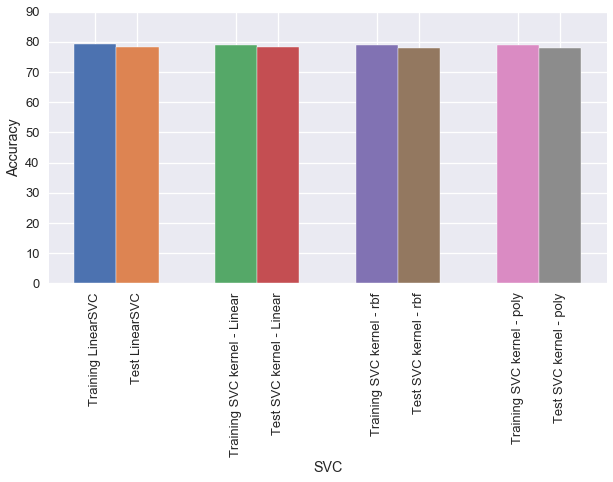

In [91]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.3
plt.xlabel('SVC')
plt.ylabel('Accuracy')
plt.ylim(0,90)
labels = ['Training LinearSVC','Test LinearSVC','Training SVC kernel - Linear','Test SVC kernel - Linear','Training SVC kernel - rbf',
          'Test SVC kernel - rbf','Training SVC kernel - poly','Test SVC kernel - poly']
labels1 = ['Training LinearSVC','Test LinearSVC','Training SVC kernel - Linear','Test SVC kernel - Linear','Training SVC kernel - rbf',
          'Test SVC kernel - rbf','Training SVC kernel - poly','Test SVC kernel - poly']
list_ticks = [0,.3,1,1.3,2,2.3,3,3.3]
ax.set_xticks(list_ticks)
for j in range(0,4,1) :
    ax.set_xticklabels(labels,rotation=90)
    ax.set_xticklabels(labels1,rotation=90)
accuracies_train=[79.33,79.10,79.08,78.99]
accuracies_test=[78.14,78.19,77.80,77.80]
for i in range(0,4,1) :
    ax.bar(i,accuracies_train[i],width)
    ax.bar(i+width,accuracies_test[i],width)
plt.grid()

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print('Train score: {:.2f}'.format(dtree.score(X_train, y_train)))
print('Test score: {:.2f}'.format(dtree.score(X_test, y_test)))

Train score: 1.00
Test score: 0.70


### Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.70638298 0.7248227  0.70212766 0.77446809 0.72443182 0.69744318
 0.71448864 0.74289773 0.70880682 0.70981508]


In [94]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.72


### Gridsearch with Cross Validation

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20, 50, 100]}

dtree_clf = GridSearchCV(dt, param_grid, cv = 10, return_train_score=True)
dtree_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 50, 100]},
             pr

In [96]:
print("Best parameters: {}".format(dtree_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(dtree_clf.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 5}
Best cross-validation score: 0.77


In [97]:
dtree_best = DecisionTreeClassifier(max_depth = 5)
dtree_best.fit(X_train,y_train)
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(dtree_best.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtree_best.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 0.79
Accuracy of Decision Tree Classifier on test set: 0.78


In [100]:
from sklearn.metrics import confusion_matrix
dtree_predicted = dtree_best.predict(X_test)
confusion = confusion_matrix(y_test, dtree_predicted)

print('Decision Tree \n', confusion)

Decision Tree 
 [[1127  171]
 [ 227  236]]


### F1 Score for KNN

In [101]:
print("F1 Score for Decision Tree on training set {:.4f}".format(f1_score(y_train,dtree_best.predict(X_train) , average='micro')))
print("F1 Score for Decision Tree on test set {:.4f}".format(f1_score(y_test,dtree_best.predict(X_test) , average='micro')))

F1 Score for Decision Tree on training set 0.7931
F1 Score for Decision Tree on test set 0.7740


## Model Performance

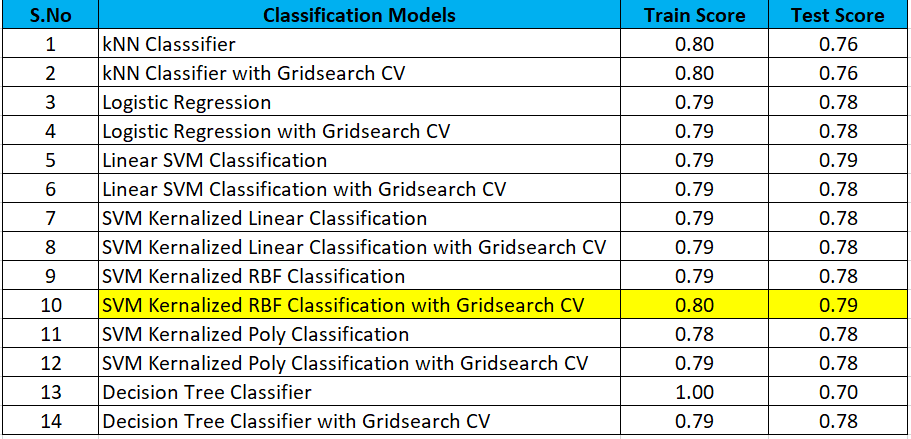

In [102]:
from IPython.display import Image
Image(filename = r"ModelComparision.png", width = 500, height = 300)

## Conclusion

After running multiple models for the given dataset, we have concluded that the below model with the specified parameters 
will give us best result for classification of the target variable 'Churn'

Model : SVM Kernalized RBF Classification with Gridsearch CV

Best parameters: {'C': 10, 'gamma': 0.001}

Train score on best parameters of SVM Kernalized RBF Classification with Gridsearch CV : 0.80

Test score on best parameters of SVM Kernalized RBF Classification with Gridsearch CV : 0.79